### Mediapipe Documentation: https://ai.google.dev/edge/mediapipe/solutions/guide ### 

## 0. Setup and Imports ##

In [ ]:
%pip install mediapipe opencv-python

In [1]:
from workouts import *

In [ ]:
track_shoulder_presses(video_source=0)  # Change video_source if neccessary

In [2]:
# Run the tracker on a prerecorded video
track_shoulder_presses_on_video("dumbbell_overhead_shoulder_press.mp4", "dumbbell_overhead_shoulder_press_output.mp4", "shoulder_press.csv")

C:\Users\dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Failed to grab frame.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv("shoulder_press.csv")

# Show the first few rows of the data
df.head()

,Frame,Left_Shoulder_X,Left_Shoulder_Y,Left_Elbow_X,Left_Elbow_Y,Left_Hip_X,Left_Hip_Y,Right_Shoulder_X,Right_Shoulder_Y,Right_Elbow_X,Right_Elbow_Y,Right_Hip_X,Right_Hip_Y,Left_Angle,Right_Angle
0,0,470.603335,310.106385,477.681202,375.209928,447.657305,436.520800,385.703480,307.594979,364.528620,373.891675,399.615455,438.652673,147.704376,133.838384
1,1,470.512462,310.321498,477.685493,375.266388,447.743458,436.529598,385.626903,307.818568,364.740193,373.865551,399.614489,438.725120,147.677458,134.011446
2,2,470.330822,310.432380,477.694988,375.281838,447.747964,436.516213,385.606170,307.835788,364.958230,373.778111,399.596384,438.719219,147.605024,134.187323
3,3,470.221549,310.448152,477.696919,375.285244,447.787473,436.514282,385.577336,307.868779,365.087995,373.767757,399.596518,438.762242,147.550853,134.331142
4,4,470.168817,310.481599,477.697241,375.295034,447.784844,436.513853,385.519132,307.905391,365.167576,373.759711,399.554327,438.773346,147.507419,134.455260


In [4]:
# Get summary statistics of the data
df.describe()

# Get information about the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Frame             925 non-null    int64  
 1   Left_Shoulder_X   925 non-null    float64
 2   Left_Shoulder_Y   925 non-null    float64
 3   Left_Elbow_X      925 non-null    float64
 4   Left_Elbow_Y      925 non-null    float64
 5   Left_Hip_X        925 non-null    float64
 6   Left_Hip_Y        925 non-null    float64
 7   Right_Shoulder_X  925 non-null    float64
 8   Right_Shoulder_Y  925 non-null    float64
 9   Right_Elbow_X     925 non-null    float64
 10  Right_Elbow_Y     925 non-null    float64
 11  Right_Hip_X       925 non-null    float64
 12  Right_Hip_Y       925 non-null    float64
 13  Left_Angle        925 non-null    float64
 14  Right_Angle       925 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 108.5 KB


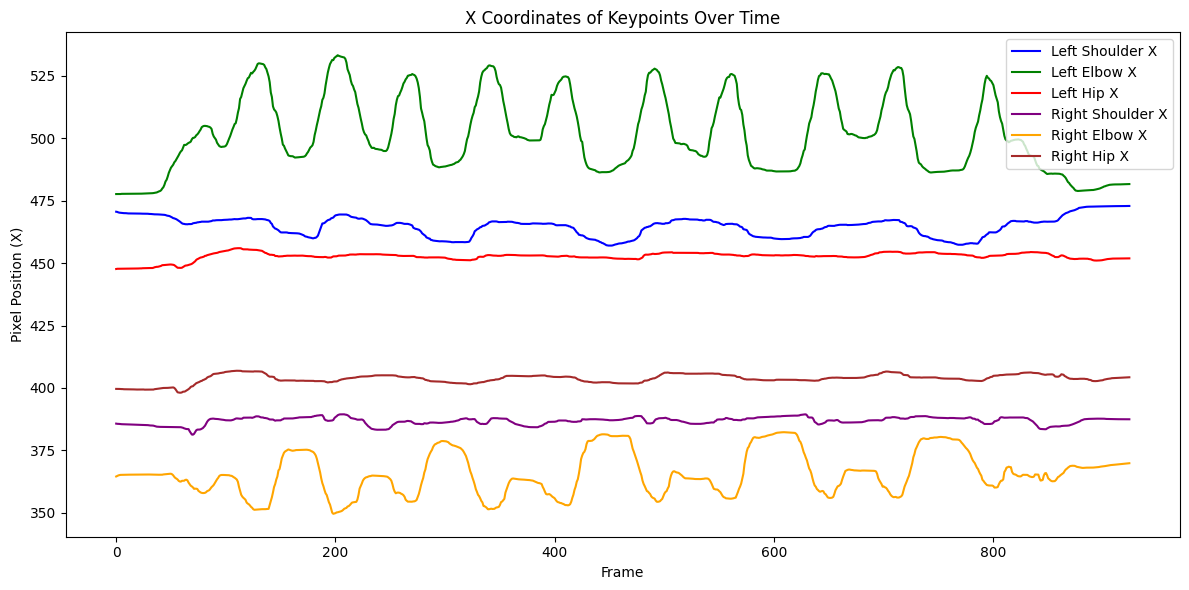

In [7]:
# Plot X Coordinates for All Keypoints Over Time
plt.figure(figsize=(12, 6))

# Plot Left Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], df["Left_Shoulder_X"], label="Left Shoulder X", color='blue')
plt.plot(df["Frame"], df["Left_Elbow_X"], label="Left Elbow X", color='green')
plt.plot(df["Frame"], df["Left_Hip_X"], label="Left Hip X", color='red')

# Plot Right Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], df["Right_Shoulder_X"], label="Right Shoulder X", color='purple')
plt.plot(df["Frame"], df["Right_Elbow_X"], label="Right Elbow X", color='orange')
plt.plot(df["Frame"], df["Right_Hip_X"], label="Right Hip X", color='brown')

plt.title("X Coordinates of Keypoints Over Time")
plt.xlabel("Frame")
plt.ylabel("Pixel Position (X)")
plt.legend()
plt.tight_layout()
plt.show()

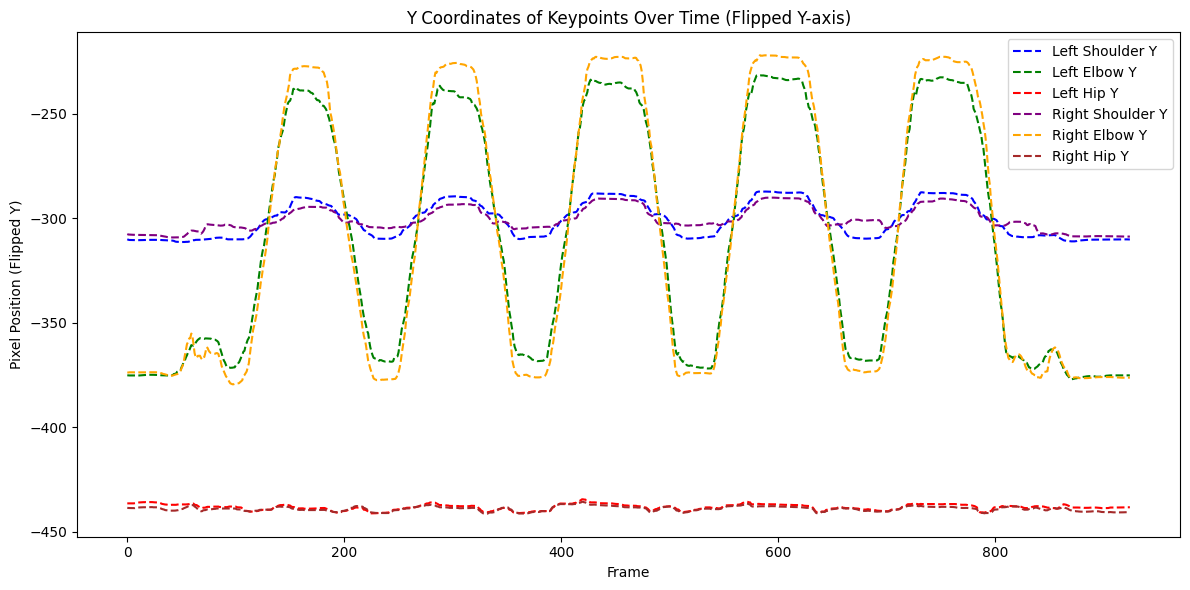

In [8]:
# Plot Y Coordinates for All Keypoints Over Time (with flipped Y values for better interpretation)
plt.figure(figsize=(12, 6))

# Plot Left Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], -df["Left_Shoulder_Y"], label="Left Shoulder Y", color='blue', linestyle='--')
plt.plot(df["Frame"], -df["Left_Elbow_Y"], label="Left Elbow Y", color='green', linestyle='--')
plt.plot(df["Frame"], -df["Left_Hip_Y"], label="Left Hip Y", color='red', linestyle='--')

# Plot Right Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], -df["Right_Shoulder_Y"], label="Right Shoulder Y", color='purple', linestyle='--')
plt.plot(df["Frame"], -df["Right_Elbow_Y"], label="Right Elbow Y", color='orange', linestyle='--')
plt.plot(df["Frame"], -df["Right_Hip_Y"], label="Right Hip Y", color='brown', linestyle='--')

plt.title("Y Coordinates of Keypoints Over Time (Flipped Y-axis)")
plt.xlabel("Frame")
plt.ylabel("Pixel Position (Flipped Y)")
plt.legend()
plt.tight_layout()
plt.show()